<a href="https://colab.research.google.com/github/dvpaa/Hands-on-Machine-Learning/blob/main/Chapter_04_%EB%AA%A8%EB%8D%B8%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

># 목차
- 선형 회귀
- 경사 하강법
- 다항 회귀
- 릿지,랏쏘 회귀
- 로지스틱 회귀

# 1. 선형 회귀
:선형 방정식을 이용한 회귀 알고리즘

일반적으로 선형 모델은 입력 특성의 가중치($θ_1$~$θ_n$) 합과 편향이라는 상수를 더해 예측을 만든다.

  - $\widehat{y}= θ_0 + θ_1x_1 + θ_2x_2 + \cdots + θ_nx_n$

    - $\widehat{y} =$ 예측값

    - $n=$ 특성의 수

    - $x_i =$ i번째 특성값

    - $θ_j =$ j번째 모델 파라미터

이 식은 벡터 형태로 더 간단하게 쓸수도 있다.

  - $\widehat{y}=h_0(x)=θ\cdot x$

    - $θ$는 편향 $θ_0$과 $θ_1$에서 $θ_n$까지의 특성 가중치를 담은 모델의 피라미터 벡터이다.

    - $x$는 $x_0$에서서 $x_n$까지 담은 샘플의 특성 벡터이다. $x_0$은 항상 1이다.
    
    - $θ\cdot x$는 벡터 $θ$와 $x$의 점곱이다. 이는 $θ_0x_1 + θ_1x_1 + θ_2x_2 + \cdots + θ_nx_n$ 와 같다.

    - $h_0$는 모델 파라미터 $θ$를 사용한 가설 함수이다.        


회귀에 가장 널리 사용되는 성능 측정 지표는 평균 제곱근의 오차(RMSE)이다. 그러므로 선형 회귀 모델을 훈련시키려면 RMSE를 최소화 시키는 θ 값을 찾아야 한다.

실제로는 RMSE 보다 평균 제곱 오차(MSE)를 최소화 시키는 것이 같은 결과를 내면서 더 간단하다.

- $MSE(X,h_0)={1 \over m}\sum_{i=1}^m (θ^Tx^{(i)}-y^{i})^2$ 
  - m = 샘플의 갯수

## 1) 정규 방정식

비용 함수를 최소화하는 θ값을 찾기 위한 해석적인 방법이 있다. 다른 말로 하면 바로 결과를 얻을 수 있는 수학 공식인데 이를 `정규방정식`이라고 한다.

  - $\widehat{θ}=(X^TX)^{-1}X^Ty $
    - $\widehat{θ}$은 비용 함수를 최소화하는 θ값 이다.
    - $y$는 $y^{(1)}$부터 $y^{(m)}$까지 포함하는 타깃 벡터이다.



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
X = 2* np.random.rand(100, 1) # (0~1)*2 사이의 난수, 100x1 크기의 행렬이 만들어짐
y = 4 + 3*X  + np.random.randn(100,1) # 오차를 약간 줘서 실제 모델과 비슷하게 만들기 위함

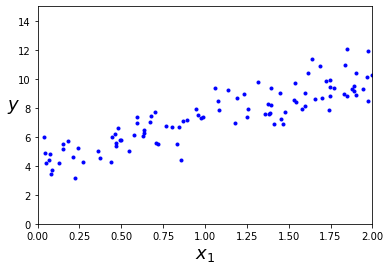

In [ ]:
# X,y 그래프 그리기
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

- 정규 방정식을 사용해 $\widehat{θ}$을 계산

-> 넘파이 선형대수 모듈(np.linalg)에 있는 inv() 함수를 사용해 역행렬을 계산하고 dot()메서드를 사용해 행렬 곱셈을 한다.

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]  # np.c_ ==> 두 배열을 열로 붙여 2차원 배열 만들기 // 모든 샘플에 x0 = 1을 추가 (X0은 항상 1이므로)
theta_b) # np.linalg.inv ==> 역행렬 // 회귀계수 추정식


SyntaxError: ignored

In [ ]:
theta_best # 데이터 생성을 위해 사용한 실제 함수는 y=4+3x로 4와 3에 매우 근사한 값이나 노이즈 때문에 정확히 표현은 안됨


In [ ]:
X_new = np.array([[0], [2]]) # 예측할 데이터
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가
y_predict = X_new_b.dot(theta_best)
y_predict # theta_best을 이용한 예측값

In [ ]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="prediction") # 회귀직선 그리기
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

-> 정규 방정식을 통해 구한 최소의 MSE를 갖는 선형 방정식을 구하였다.

## 2) 사이킷런에서 선형 회귀의 수행

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg= LinearRegression()
lin_reg.fit(X,y) # -> 훈련 끝
lin_reg.intercept_, lin_reg.coef_

In [ ]:
lin_reg.predict(X_new)

## 3) 계산 복잡도

- 역행렬을 구하는 시간은 일반적으로 $O(n^{2.4})$에서 $O(n^3)$ 사이 ( 즉, 특성이 $2$배로 늘어나면 계산 시간은 $2^{2.4}$ ~ $2^3$배로 증가 )
- 훈련 세트 증가에 따른 계산 시간은 선형적으로 증가 ( 즉, 훈련 세트가 $2$배로 늘어나면 계산 시간도 $2$배로 증가 )
- 정규 방정식도 특성이 매우 많아지면 ( 예를 들어 $100,000$개 ) 속도가 매우 느려짐

-> 이를 모델의 `파라미터 공간(parameter space)`에서 파라미터 조합을 찾는다 라고 한다

# 2. 경사 하강법
:경사 하강법(gradient descent)은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘이다. 

경사 하강법의 기본 아이디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것이다.
- 파라미터 벡터 θ에 대해 비용 함수의 현재 경사(gradient)를 계산한다.
- gradient가 감소하는 방향으로 진행을 한다.
- gradient가 0이 되면 최솟값에 도달한 것
> θ 를 임의의 값으로 시작해서 한 번에 조금씩 비용 함수( ex)MSE )가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상시킨다.

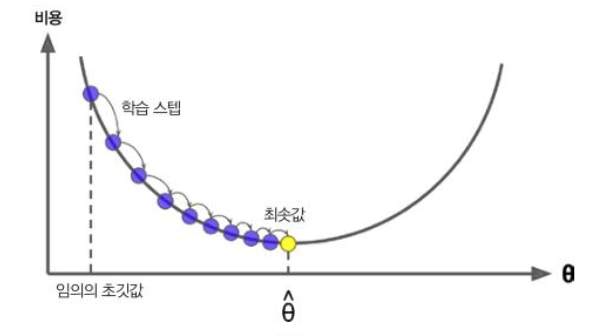

-> 경사 하강법에서 중요한 파라미터는 스텝의 크기로,

 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래걸린다.

## 1) 배치 경사 하강법

: 매 스텝마다 전체 훈련 세트에 대한 gradient 계산(큰 데이터에서 매우 느리지만 특성 수에 민감하지 않음)

In [ ]:
eta = 0.1 # step size (학습률)
n_iterations = 1000 #반복 횟수
m = 100 # sample size
theta = np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # 매 스텝마다 그래디언트 계산
    theta = theta - eta * gradients # 매 스텝마다 모수 최신화
    
theta # 정규방정식과 같은 theta 값 출력

-> 정규 방정식과 같이 theta 값이 유사하게 나옴

In [ ]:
X_new_b.dot(theta) # 계산된 theta

-> 예측값

In [ ]:
# theta에 따른 그래프 그리기 함수
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta) # 예측
            style = "b-" if iteration > 0 else "r--" # 처음 style은 'r--'', 이후는 'b-'
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # 매 스텝마다 그래디언트 계산(m = m)
        theta = theta - eta * gradients # 매 스텝마다 모수 최신화
        if theta_path is not None:
            theta_path.append(theta) # 매 스텝의 theta 저장
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

In [ ]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

## 2) 확률적 경사 하강법 (SGD)

> - 모델 파라미터 랜덤 초기화 (θ)
- 에포크 시작 (큰 반복)
  - 훈련 세트 섞기
    - 훈련 세트에서 샘플 하나 꺼내기
    - 경사 하강법 수행(배치 경사법)
    - 모델 파라미터 수정 (경사 하강법에서 얻은 gradient에 step size를 곱함)
    - 반복
  - 반복 (지정한 에포크만큼 반복)
- 종료


- 배치 경사 하강법은 모든 샘플에 대해 gradient를 계산하여 매우 느리다.
- 매 스텝마다 임의의 한 샘플에 대한 gradient 계산(매우 적은 데이터를 처리하여 빠르지만 불안정-> 지역 최적해를 건너뛰거나 전역 최적해 못 찾음 등)
- 불안정의 해결책으로 매 반복마다 학습률을 결정하는 함수(학습 스케쥴)을 사용해 학습률을 줄여나간다.

In [ ]:
theta_path_sgd = []
m = len(X_b) # sample size
np.random.seed(42)

In [ ]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)      
            # epoch 만큼 선형을 그림 -> epoch이 증가함에 따라 손실함수가 최소가 되는 걸 아래 그래프가 보여줌
            random_index = np.random.randint(m) # 0~m의 랜덤 정수(스텝 불규칙하게 진행 SGD의 경우 미리 서플 -> 이 경우 성능은 조금 떨어짐)

        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # 매 스텝마다 그래디언트 계산(m = 1이므로 생략됨)
        eta = learning_schedule(epoch * m + i)       # 매 스텝마다 학습률 최신화(점점 작아짐)
        theta = theta - eta * gradients              # 매 스텝마다 모수 최신화
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")                                
plt.xlabel("$x_1$", fontsize=18)                  
plt.ylabel("$y$", rotation=0, fontsize=18)          
plt.axis([0, 2, 0, 15])                           
plt.show()                                        


In [ ]:
theta

sklearn에서 SGD 방식으로 선형회귀를 사용하기 위해서는 기본값으로 MSE 함수를 최적화 하는 SGDRegressor를 사용한다.

In [ ]:
from sklearn.linear_model import SGDRegressor
# 최대 1000번의 epoch, 허용오차: 0.001, 학습률: 0.1
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

## 3) 미니배치 경사 하강법

- 매 스텝마다 작은 샘플 세트(미니배치)에 대한 gradient를 계산한다.
(미니배치가 어느정도 크면 SGD보다 덜 불규칙하게 움직임)
- GPU를 사용하여 연산하므로 성능의 향상이 있다.

In [ ]:

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m) # 매 epoch마다 순서 섞기
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size): # 0~m까지 i 간격은 minibatch_size 만큼
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi) # 매 스텝마다 그래디언트 계산(m = minibatch)
        eta = learning_schedule(t)  # 매 스텝마다 학습률 최신화(점점 작아지고 확률적 경사 하강법과 다름)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta) # 매 스텝마다 모수 최신화
#(미니배치가 어느정도 크면 SGD보다 덜 불규칙하게 움직임)
#- GPU를 사용하여 연산하므로 성
#- 로지스틱 회귀 theta_path_mgd.append(theta) # 매 스텝마다 theta 저장


In [ ]:
theta

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

In [ ]:
# 배치 경사 하강법, 확률적 경사 하강법, 미니배치 경사 하강법 시각화
theta_path_bgd = np.array(theta_path_bgd) # 배치 경사 하강법의 theta 저장값
theta_path_sgd = np.array(theta_path_sgd) # 확률적 경사 하강법의 theta 저장값
theta_path_mgd = np.array(theta_path_mgd) # 미니배치 경사 하강법의 theta 저장값

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()# BGD는 잘 찾아가나 오래걸리고 SGD, MGD는 빠르게 찾아가나 근처를 맴돔



- SGD - 확률적
- MGD - 미니배치
- BGD - 배치


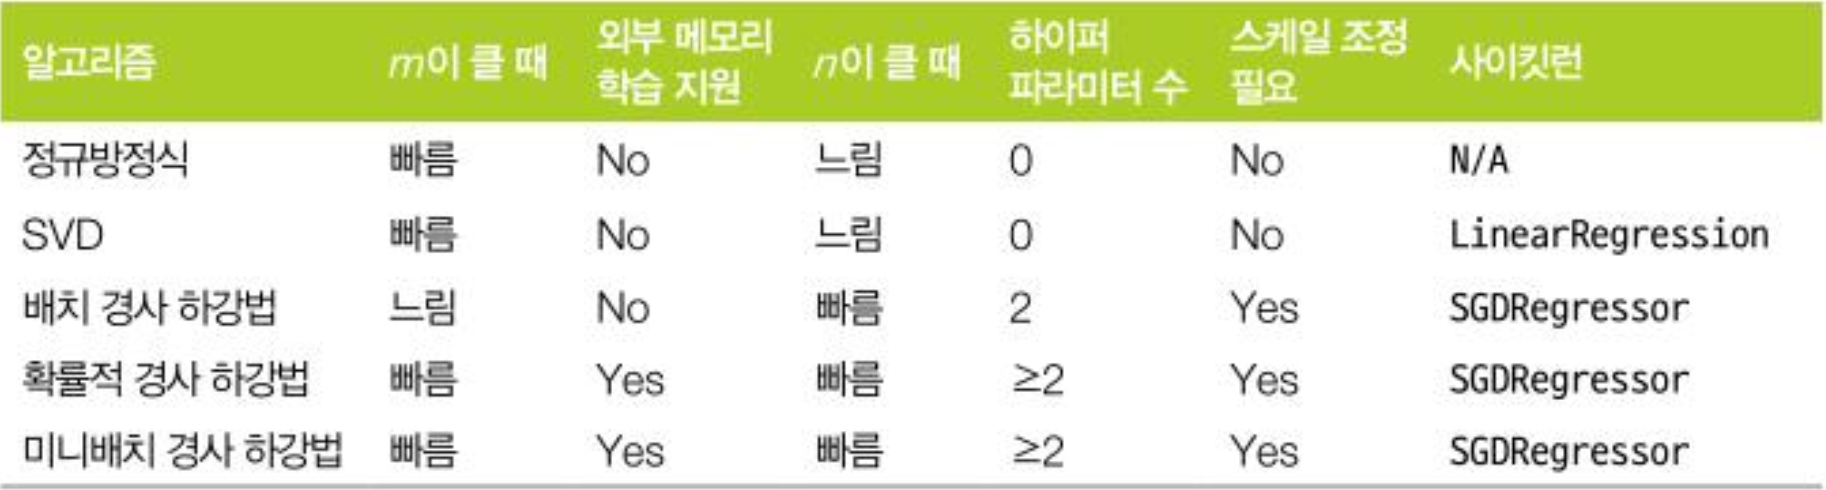

# 3. 다항 회귀

- 비선형 데이터를 학습하는 선형 모델
- ex) 각 특성의 거듭제곱을 새로운 특성으로 추가하고,

 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것

In [ ]:
np.random.seed(42)

m = 100 # sample size
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # 2차방정식

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

-> 2차방정식으로 비선형 데이터 생성

In [ ]:
from sklearn.preprocessing import PolynomialFeatures # PolynomialFeatures ==> 다항식으로 변환하는 함수

# (만약 degree=3,include_bias=False의 경우 (x1,x2) -> (x1, x2, x1^2, x2^2, x1^3, x2^3, x1*x2, x1^2*x2, x1*x2^2))
poly_features = PolynomialFeatures(degree=2, include_bias=False) # degree ==> 차수, include_bias ==> 상수항 여부
X_poly = poly_features.fit_transform(X) # (x) -> (x, x^2)
X[0], X_poly[0] # X_poly는 기존 X에서 특성이 추가됨

-> 훈련 세트에 있는 각 특성을 제곱하여 새로운 특성 추가

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1) # np.linspace ==> -3 ~ 3 까지 100개로 나눔
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="prediction")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

실제 : $ y = 0.5{x_1}^2 + 1.0x_1 + 2.0$

예측 : $\widehat{y} = 0.56{x_1}^2 + 0.93x_1 + 1.78$

# 4. 학습곡선

- ( 학습 데이터 MSE / 검증 데이터 MSE) 둘의 차이가 클때 오버피팅 적게 나면 일반화가 잘된 모델

In [ ]:
# 여러 차원의 회귀 그래프 그리기
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False) # 다항식으로 만들기
    std_scaler = StandardScaler() # 표준화
    lin_reg = LinearRegression() # 선형 회귀
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ]) # 파이프라인(다항식 -> 표준화 -> 선형회귀)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show() # 1차 회귀의 경우 과소적합, 300차 다항 회귀의 경우 과대적합


300차 다항 회귀 모델은 훈련 샘플에 가능한 한 가까이 가려고 구불구불하게 나타냄.

=> 과대적합

### 모델 데이터에 과대적합/과소적합 여부 확인하기

-> 학습 곡선 살펴보기

In [ ]:
# 학습 곡선 그래프 만드는 함수
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)): # 데이터를 하나씩 추가하면서 성능 확인
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict)) # training MSE 저장
        val_errors.append(mean_squared_error(y_val, y_val_predict)) # verification MSE 저장

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="training")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="verification")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("training size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show() # 단순 선형 회귀 모델(직선)의 학습 곡선 ==> 과소적합


->과소적합 모델의 전형적인 모습.

:모델이 훈련 데이터에 과소적합되어 있다면 훈련 샘플을 더 추가해도 효과가 없다.

더 복잡한 모델을 사용하거나 더 나은 특성을 선택해야한다.

- 훈련 세트가 적으면 제대로 일반화가 될 수 없어 오차가 크지만, 

- 훈련 샘플이 추가되면서 줄어듬(다만, 선형 모델이라 어느정도 오차가 있음)

In [ ]:
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show() # 10차 다항 회귀 곡선의 학습 곡선 ==> 과대적합(더 많은 데이터 필요)
# 곡선의 공간이 크다면 과대적합을 의심할 필요가 있음

-> 두 곡선 사이에 공간이 있다.

이 말은 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고,

이는 과대적합 모델의 특징이다. 

그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워진다.

- 과대 적합 모델 개선 방법
  - 검증 오차가 훈련 오차에 근접할 때까지 더 많은 훈련 데이터를 추가한다.

>편향/분산 트레이드오프

- 통계학과 머신러닝에서 나온 중요한 이론 하나는 모델의 일반화 오차는 세 가지 다른 종류의 오차의 합으로 표현 가능
  - 편향: 일반화 오차중 잘못된 가정으로 인한 것(편향이 큰 모델은 과소적합되기 쉬움 // ex - 복잡도 낮은 모델로 고차원 예측)
  - 분산: 훈련 데이터에 있는 작은 변동이 모델에 과도하게 민감하여 나타남(분산이 큰 모델은 과대적합이 쉬움 // ex - 고차원 모델, 자유도 높은 모델 사용)
  - 줄일 수 없는 오차: 데이터 자체에 있는 노이즈 때문에 발생하며 데이터에서 오차를 없애야만 줄일 수 있음(ex - 이상치 제거 등)
  - MSE = bias^2(편향) + var(분산)의 값이라 볼 수 있음
- 모델이 복잡 -> 불안정: 이상치에 매우 민감하게 반응 ==> 과대적합
- 모델이 naive -> 안정적: 이상치에 큰 반응이 없음 ==> 과소적합

# 5. 규제가 있는 선형 모델

규제란?

:머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것.(과대적합 방지)

- 과대 적합을 예방하기 위해 모델을 규제(선형에서는 주로 가중치를 제한)
- 회귀 모델 평가: MSE + 복잡성에 대한 penalty(모델의 분산을 낮춤)

## 1) 릿지 회귀

**`릿지 회귀`**(또는 티호노프 규제)는 **`규제(regularization)`**가 추가된 선형 회귀 모델이다. **`규제항(regularization term)`**이 비용함수(cost function)에 추가된다.(MSE + l2)

따라서, 모델(알고리즘)을 데이터에 적합 시키는 것뿐만 아니라 모델의 **가중치가 가능한 작게** 유지되도록 한다.

 규제항은 학습에만 사용되며 테스트 시에는 규제항이 사용되지 않는다.




In [ ]:
# 알파에 따른 릿지 회귀 그리는 함수
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20 # sample size
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression() # 0이면 선형 회귀 아니면 릿지 회귀
        if polynomial: # polynomial가 True이면 해당 if문 수행
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ]) # 파이프라인(다항식 -> 표준화 -> 선형회귀)
        model.fit(X, y)
        y_new_regul = model.predict(X_new) # 예측
        lw = 2 if alpha > 0 else 1 # 선형회귀면 lw = 1, 릿지 회귀면 lw = 2
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42) # 알파에 따른 단순 릿지 회귀
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**(-5), 1), random_state=42) #다항식, 표준화 후 알파에 따른 릿지 회귀
                # α= 규제 강도 / α ∝ 규제
plt.show()

-> 비용 함수에 l2 거리의 제곱을 2로 나눈 규제가 추가된 선형 회귀



In [ ]:
# 정규방정식을 사용한 릿지 회귀1
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42) # cholesky ==> 행렬 분해 방법(희소행렬, 특이행렬 아닐 경우 기본값)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

In [ ]:
# 정규방정식을 사용한 릿지 회귀2
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42) # sag ==> SGD의 변종(사이킷런 0.19에서 개량 버전 saga 추가됨)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

In [ ]:
# 확률적 경사 하강법을 사용한 릿지 회귀
sgd_reg = SGDRegressor(max_iter=50, penalty="l2", tol=1e-3, random_state=42) # l2의 경우 노름의 제곱을 2로 나눈 규제항 추가 = 릿지 회귀
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

-> 매개변수에 따라 예측값이 달라짐

## 2) 라쏘 회귀
: 비용 함수에 가중치 벡터의 l1 노름을 사용하는 규제로 추가한 선형 회귀( 알파가 매우 클 경우 가중치를 0으로 만듬 -> 특성 자동 선택 )

In [ ]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42) # 알파에 따른 단순 라쏘 회귀
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42) #다항식, 표준화 후 알파에 따른 라쏘 회귀
plt.show() # 릿지보다 알파의 규제의 정도가 강함

In [ ]:
# 정규방정식을 사용한 라쏘 회귀
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

In [ ]:
# 확률적 경사 하강법을 사용한 라쏘 회귀(라쏘 회귀의 비용 함수는 미분이 불가 => 서브그래디언브 벡터 사용)
sgd_reg = SGDRegressor(max_iter=50, penalty="l1", tol=1e-3, random_state=42) # l1 서브그래디언트 벡터를 사용한 미분 = 라쏘 회귀
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

## 3) 엘라스틱 넷 
:릿지와 라쏘의 규제를 단순히 더하여 r로 혼합비율을 조절하는 절충 모델 (r=0이면 릿지 회귀, r=1이면 라쏘회귀와 같음)

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

릿지, 라쏘, 엘라스틱넷 모델 활용 시기

- 대부분의 경우 일반적인 선형 모델보다는 규제가 있는 경우가 좋음
- 릿지: 기본적으로 사용
- 라소: 특성 수가 샘플보다 적고 특성 몇개가 강하게 연관되어 있지 않으며 실제 쓰이는 특성이 별로 없는 경우
- 엘라스틱넷: 특성 수가 샘플보다 많고 특성 몇개가 강하게 연관되어 있으며 실제 쓰이는 특성이 별로 없는 경우

## 4) 조기 종료

:검증 에러가 최소에 도달하는 즉시 훈련을 멈추는 것

In [ ]:
# 조기 종료를 위한 그래프 확인
np.random.seed(42)
m = 100 # sample size
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10) # 훈련, 검증 분할

In [ ]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 중지된 곳에서 다시 시작합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)


그래프 그리기

In [ ]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('best model',
             xy=(best_epoch, best_val_rmse), # xy ==> 화살표가 가르키는 점의 위치
             xytext=(best_epoch, best_val_rmse + 1), # xytext ==> 문자열이 출력될 점의 위치
             ha="center", # ha ==> 화살표 형태?
             arrowprops=dict(facecolor='black', shrink=0.05), # arrowprops ==> 화살표의 특성들 설정
             fontsize=16
            ) # annotate ==> 그림에 글 추가

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2) # 검은 점선 생성
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="verification set") # 검증 세트 그래프
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="training set") # 트레이닝 세트 그래프
plt.legend(loc="upper right", fontsize=14) 
plt.xlabel("epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show() # 검증 세트가 최고점 이후 다시 증가하는 것은 과대적합되기 시작한 것


-> 에포크가 진행됨에 따라 알고리즘이 점차 학습되어

 훈련 세트에 대한 예측 에러(RMSE)와 검증 세트에 대한 예측 에러가 줄어든다.

 -> 그러나 잠시 후 감소하던 검증 에러가 멈추었다가 다시 상승한다.
 
 모델이 훈련 데이터에 과대적합되기 시작하는 것을 의미함

 - 검증 에러가 최소에 도달하는 즉시 훈련을 멈춘다.

In [ ]:
best_epoch, best_model # 최고의 스텝과 파라미터

# 6. 로지스틱 회귀
- 이름은 회귀지만 실제로는 분류 모델이다.
- 선형 회귀와 동일하게 선형 방정식을 학습한다.
    - z = a x (Weight) + b x (Length) + c x (Diagonald) + d x (Height) + e
        
        ( a,b,c,d,e 는 각각 가중치 혹은 계수 이다.)
        
- 위 식에서 z가 아주 큰 음수일 때 0이되고, 아주 큰 양수일 때 1이 되도록 하는 방법?
    - 시그모이드 함수 (로지스틱 함수) 사용!
샘플이 특정 클래스에 속할 확률을 추정하는데 널리 사용한다.

## 1) 확률 추정
:선형 회귀 모델과 같이 로지스틱 회귀는 입력 특성의 가중치 합을 계산한다.

대신 선형 회귀처럼 바로 결과를 출력하지 않고 결과값의 로지스틱(0~1 값을 출력하는 시그모이드 함수)을 출력한다.

In [ ]:
# 로지스틱(시그모이드) 함수 그리기
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t)) # 로지스틱 함수
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-") # x축
plt.plot([-10, 10], [0.5, 0.5], "k:") # y=0.5 점선
plt.plot([-10, 10], [1, 1], "k:") # y=1 점선
plt.plot([0, 0], [-1.1, 1.1], "k-") # y축
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$") # 로지스틱 그래프
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

## 2) 훈련과 비용 함수

**식 4-16: 하나의 훈련 샘플에 대한 비용 함수**

$
c(θ)=
\begin{cases}
-log(\widehat{p}), & \mbox{if  }\mbox{ y = 1,} \\
-log(1-\widehat{p}), & \mbox{if  }\mbox{ y = 0}
\end{cases}
$

**식 4-17: 로지스틱 회귀 비용 함수(로그 손실)**

$J(θ)= -1/m\sum_{i=1}^m [y^{(i)}log(\widehat{p})^{(i)}+(1-y^{(i)})log(`-\widehat{p})^{(i)}]$

**식 4-18: 로지스틱 비용 함수의 편도 함수**


$
\frac{∂}{∂θ} j(J(θ)) = \frac{1}{m}\sum_{i=1}^m (σ(θ^Tx^{(i)})−y(i)){x_j}^{(i)}
$



## 3) 결정 경계



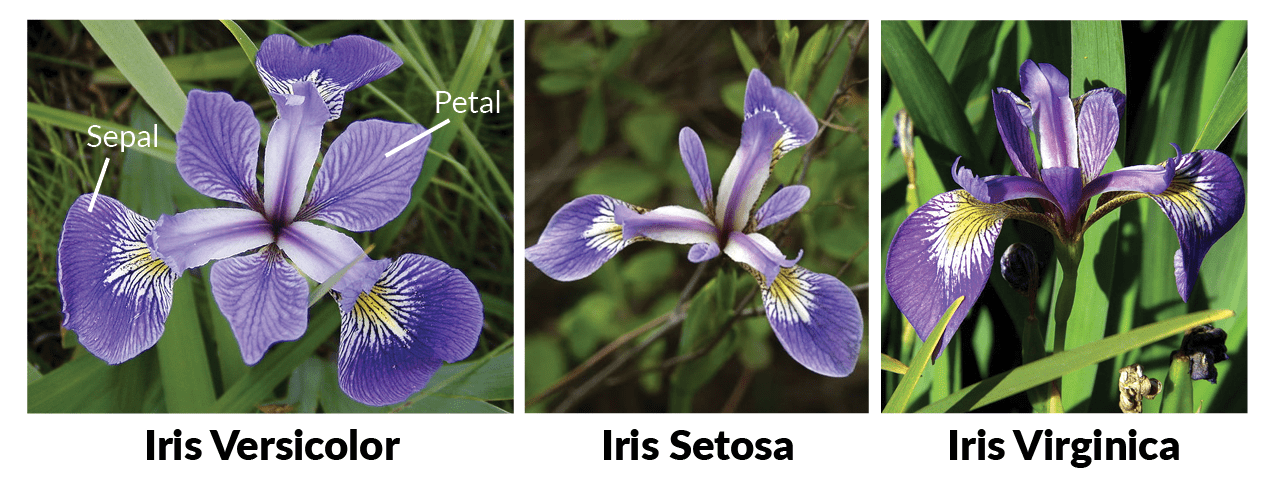

### Petal width(꽃잎 너비)를 이용한 Verginca 종 분류기 구현

꽃잎의 너비를 기반으로 Iris-Versicolor종을 감지하는 Classifier를 만들어 보면 다음과 같다.

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris['data'][: , 3: ] # 꽃입의 너비
y = (iris['target'] == 2).astype(np.int64) # Verginca면 1 아니면 0

로지스틱 회귀 모델을 훈련

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [ ]:
decision_boundary

In [ ]:
log_reg.predict([[1.7], [1.5]])

### Petal width, Petal length를 이용한 Verginica 분류기 구현

(특성 두개)

In [ ]:

from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)


x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

다른 선형 모델 처럼 로지스틱 회귀도 $l_1,l_2$
 페널티를 적용하여 규제 할 수 있다. 사이킷런의 기본값은 
$l_2$ 페널티를 기본으로 한다.

## 4) 소프트맥스 회귀

로지스틱 회귀 모델은 여러개의 이진 분류기를 만들지 않고, 다중 클래스(multinomial class) 분류에 적용할 수 있다. 이것을 소프트맥스 회귀(Softmax Regression) 또는 다항 로지스틱 회귀(Multinomial Logistic Regression)이라고 한다.

소프트맥스 회귀의 개념은 데이터 
$x$
에 대해 소프트맥스 회귀 모델이 각 클래스 
$k$
에 대한 점수(score) 
$S_k(x)$
를 계산하고, 그 점수값에 소프트맥스 함수softmax function(또는 정규화된 지수함수normalized exponential function)를 적용하여 각 클래스의 확률을 예측하는 모델이다.

$S_k(x)=(W_k)^T\cdot x$


$W_k$
 : 각 클래스별 가중치 파라미터 벡터

 위의 식을 이용해 소프트 맥스 함수를 적용한 식은 다음과 같다.

 $\widehat{p}_k=\sigma(s(X))_k= {exp(S_k(x)) \over \sum_{j=1}^K exp(S_j(x)) } $

 
- $K$ : 클래스의 수

- $s(x)$ : 데이터 샘플 x에 대한 각 클래스의 점수를 담고 있는 벡터

- $σ(S(x))_k$ : 샘플 x에 대한 클래스 k에 속할 추정 확률 벡터

샘플 x에 대해 각 클래스의 점수가 계산되면 소프트맥스 함수를 통과시켜 클래스 
$k$
에 속할 확률 
$p^k$
을 추정 할 수 있다. 이 함수는 각 점수에 지수 함수를 적용한 후 정규환 한 결과 이다.

소프트맥스(정규화 작업)을 통해 확률로 계산이 가능하다. 즉, 타겟 클래스일 확률 몇% 인지 확률화가 가능해진다.

로지스틱 회귀 Classifer와 마찬가지로 소프트맥스 회귀 분류기도 위의 식에서 추정된 확률 벡터 중 확률이 가장 높은 클래스로 분류가 된다. 이를 식으로 나타내면 다음과 같다.

 $\widehat{y}=argmax \cdot σ(s(X))_k = argmax \cdot S_k(x) = argmax(W_k^T\cdot x) $



### Sigmoid vs. Softmax

> 주요 차이점은 Sigmoid는 0과1이 출력이 되고, Softmax는 확률값 즉, 연속된(continous)값이 출력됨

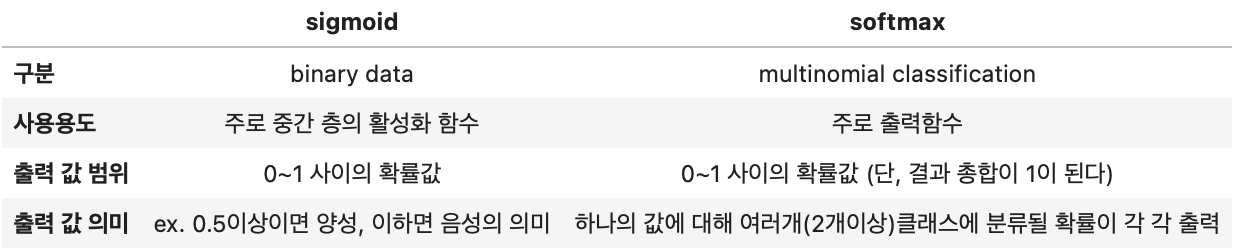

### Entropy


> 엔트로피는 `불확실성의 척도`입니다. 정보이론에서의 엔트로피는 `불확실성`을 나타내며, 엔트로피가 높다는 것은 정보가 많고, 확률이 낮다는 것을 의미한다.
$$
H(x) = - \sum_{i=1}^n p(x_i)* log p(x_i)
$$   
불확실성이라는 것은 어떤 데이터가 나올지 예측하기 어려운 경우라고 받아들이는 것이 더 직관적이다.


In [ ]:
p = np.linspace(0, 10, 100000)
log= - np.log10(p)
plt.figure(figsize=(9, 3))
plt.plot(p, log, "b-", label="$logp(x_i)$")
plt.plot([0, 0], [-5, 5], "k-")
plt.plot([-2,8], [0,0], "k-")
plt.plot([-2,8], [-1,-1], "k:")
plt.xlabel("$p(x_i)$")
plt.legend(loc="upper left", fontsize=12)
plt.axis([-2, 8, -3, 4])
plt.show()

위 엔트로피 식을 바꾸면 다음과 같다. 
$$
H(x) =  \sum_{i=1}^n p(x_i)* (-log p(x_i))
$$
$p(x_i)$는 각각의 요소들이 나올 수 있는 확률 값이다. 모든 요소들이 나올 확률이 동일 하다면, $-log(x_i)$ 값도 모두 동일 하기 때문에 식을 동일 하게 만들 수 있다.   

$p(x_i)$값의 총 합은 1이기 때문에, 수식은 $H(x) =  \sum_{i=1}^n p(x_i)* (-log p(x_i)) = -log p(x_i)$이 된다. x 값이 작아질수록 $logx$의 값이 기하 급수적으로 커진다. x가 작아진 것 보다 $logx$가 커지는 폭이 훨씬 크기 때문에, 전체 엔트로피는 증가한다. 


#### Cross-Entropy
:크로스 엔트로피는 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 사용된다.


크로스 엔트로피는 실제 분포 $q$에 대하여 알지 못하는 상태에서, 모델링을 통해 구한 분포인 $p$를 통하여 $q$를 예측 하는 것이다. **$q$와 $p$가 모두 들어가서 크로스 엔트로피**라고 한다.   

머신 러닝에서 실제 환경의 값과 $q$를, 예측값(predict) p를 모두 알고 있는 경우가 있다. **머신러닝의 모델은 몇%의 확률로 예측했는데, 실제 확률은 몇%야!** 라는 사실을 알고 있을 때 사용한다.   

크로스 엔트로피에서는 실제값과 예측값이 맞는 경우에는 0으로 수렴하고, 값이 틀릴경우에는 값이 커지기 때문에, `실제 값과 예측 값의 차이를 줄이기 위한 엔트로피`라고 보시면 될 것 같습니다.

소프트맥스 회귀의 학습을 위한 손실함수(loss function)은 **크로스 엔트로피**(cross entropy)이며 다음과 같다.  

모델이 타깃 클래스에 대해서는 높은 확률로, 다른 클래스(타킷이 아닌)에 대해서는 낮은 확률 추정을 목적으로 함.  



타겟 클래스에 대한 낮은 확률 = 타킷클랙스에 대한 불확실성 = 타깃 클래스에 대한 엔트로피 $\rightarrow$ 이것을 최소화 한다

$$
J(\mathbf{W}) = - \frac{1}{m} \sum_{i=1}^{m}{\sum_{k=1}^{K}{y_k^{(i)} \log{\left( \hat{p}_k^{(i)} \right)}}}
$$

- $i$번째 샘플에 대한 타겟 클래스가 $k$일 때, $y_k^{(i)}$가 1이고, 나머지는 0이 된다.

위의 손실함수에 대한 그래디언트 벡터는 다음과 같다.

$$
\nabla_{w^{(k)}} J(\mathbf{W}) = \frac{1}{m} \sum_{i=1}^{m}{\left( \hat{p}_k^{(i)} - y_k^{(i)} \right)\mathbf{x}^{(i)}}
$$

#### Scikit-Learn `LogisticRegression`을 이용해 Softmax Regression 사용하기

Scikit-Learn에서 [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)은 셋 이상의 다중 클래스 분류에서는 기본적으로 일대다(OvA)를 디폴트 값으로 사용하지만, `multi_class`인자를 `multinomial`로 설정하면 Softmax Regression을 사용할 수 있다. 또한 `solver` 인자에 `lbfgs`로 지정해야한다.

In [ ]:

X = iris['data'][:, (2,3)] #꽃잎 길이, 꽃잎 너비
y = iris['target']

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X,y)

In [ ]:
softmax_reg.predict([[5,2]]) # 꽃잎의 길이가 5cm, 너비가 2cm인 붓꽃을 발견했다고 가정

In [ ]:
softmax_reg.predict_proba([[5,2]])

In [ ]:
iris['target_names'][2]

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()